# Manufacture of Gowdy spacetimes with spikes by Rendall and Weaver
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 11, 2022

https://arxiv.org/abs/gr-qc/0103102

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
tau,x,y,z,dtau,dx,dy,dz = symbols('tau x y z dtau dx dy dz')

In [4]:
Lambda = Function('lambda')(x,tau)
Lambda

In [5]:
Q = Function('Q')(x,tau)
Q

In [6]:
P = Function('P')(x,tau)
P

In [7]:
variables = Matrix([tau,x,y,z])
variables

⎡τ⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix([dtau,dx,dy,dz])
differentials 

⎡dtau⎤
⎢    ⎥
⎢ dx ⎥
⎢    ⎥
⎢ dy ⎥
⎢    ⎥
⎣ dz ⎦

In [9]:
lineElement = expand(-exp((Lambda-3*tau)/2)*dtau**2 + exp((Lambda+tau)/2)*dx**2 + exp(P-tau)*(dy+Q*dz)**2 + exp(-P-tau)*dz**2)
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  -3⋅τ   λ(x, τ)                                                                          ⎤
⎢  ─────  ───────                                                                          ⎥
⎢    2       2                                                                             ⎥
⎢-ℯ     ⋅ℯ              0                0                              0                  ⎥
⎢                                                                                          ⎥
⎢                   τ  λ(x, τ)                                                             ⎥
⎢                   ─  ───────                                                             ⎥
⎢                   2     2                                                                ⎥
⎢       0          ℯ ⋅ℯ                  0                              0                  ⎥
⎢                                                                                          ⎥
⎢                                    -τ  P(x, τ)                      

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡  -3⋅τ   λ(x, τ)                                                                          ⎤
⎢  ─────  ───────                                                                          ⎥
⎢    2       2                                                                             ⎥
⎢-ℯ     ⋅ℯ              0                0                              0                  ⎥
⎢                                                                                          ⎥
⎢                   τ  λ(x, τ)                                                             ⎥
⎢                   ─  ───────                                                             ⎥
⎢                   2     2                                                                ⎥
⎢       0          ℯ ⋅ℯ                  0                              0                  ⎥
⎢                                                                                          ⎥
⎢                                    -τ  P(x, τ)                      

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("tau x y z")
tau,x,y,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂                     ∂                                                                   
⎢⎢──(λ(x, τ))           ──(λ(x, τ))                                                         
⎢⎢∂τ            3       ∂x                                                                  
⎢⎢─────────── - ─       ───────────                                         0               
⎢⎢     4        4            4                                                              
⎢⎢                                                                                          
⎢⎢  ∂              ⎛∂              ⎞  2⋅τ                                                   
⎢⎢  ──(λ(x, τ))    ⎜──(λ(x, τ)) + 1⎟⋅ℯ                                                      
⎢⎢  ∂x             ⎝∂τ             ⎠                                                        
⎢⎢  ───────────    ──────────────────────                                   0               
⎢⎢       4                   4                                        

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                               2                    2      
⎢                          2                2                  ∂              -2⋅τ  ∂       
⎢   2⋅P(x, τ) ⎛∂          ⎞    ⎛∂          ⎞    ∂             ───(λ(x, τ))   ℯ    ⋅───(λ(x, 
⎢  ℯ         ⋅⎜──(Q(x, τ))⎟    ⎜──(P(x, τ))⎟    ──(λ(x, τ))     2                    2      
⎢             ⎝∂τ         ⎠    ⎝∂τ         ⎠    ∂τ            ∂τ                   ∂x       
⎢- ───────────────────────── - ────────────── - ─────────── - ──────────── + ───────────────
⎢              2                     2               2             4                 4      
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            2⋅P(x, τ) ∂           ∂             ∂           ∂        

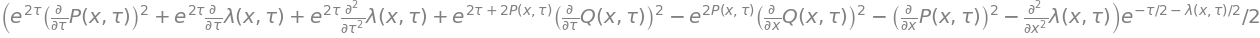

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢     ⎛                  2                             2                                    
⎢     ⎜ 2⋅τ ⎛∂          ⎞     2⋅τ ∂              2⋅τ  ∂              2⋅τ + 2⋅P(x, τ) ⎛∂     
⎢0.25⋅⎜ℯ   ⋅⎜──(P(x, τ))⎟  + ℯ   ⋅──(λ(x, τ)) + ℯ   ⋅───(λ(x, τ)) + ℯ               ⋅⎜──(Q(x
⎢     ⎜     ⎝∂τ         ⎠         ∂τ                   2                             ⎝∂τ    
⎢     ⎝                                              ∂τ                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [22]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                               2                    2      
⎢                          2                2                  ∂              -2⋅τ  ∂       
⎢   2⋅P(x, τ) ⎛∂          ⎞    ⎛∂          ⎞    ∂             ───(λ(x, τ))   ℯ    ⋅───(λ(x, 
⎢  ℯ         ⋅⎜──(Q(x, τ))⎟    ⎜──(P(x, τ))⎟    ──(λ(x, τ))     2                    2      
⎢             ⎝∂τ         ⎠    ⎝∂τ         ⎠    ∂τ            ∂τ                   ∂x       
⎢- ───────────────────────── - ────────────── - ─────────── - ──────────── + ───────────────
⎢              2                     2               2             4                 4      
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            2⋅P(x, τ) ∂           ∂             ∂           ∂        

In [23]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                 2                           2                2            
⎢   -2⋅τ + 2⋅P(x, τ) ⎛∂          ⎞     2⋅P(x, τ) ⎛∂          ⎞    ⎛∂          ⎞    ∂        
⎢  ℯ                ⋅⎜──(Q(x, τ))⎟    ℯ         ⋅⎜──(Q(x, τ))⎟    ⎜──(P(x, τ))⎟    ──(λ(x, τ
⎢                    ⎝∂x         ⎠               ⎝∂τ         ⎠    ⎝∂τ         ⎠    ∂τ       
⎢- ──────────────────────────────── - ───────────────────────── - ────────────── - ─────────
⎢                 4                               4                     4               4   
⎢                                                                                           
⎢                       2⋅P(x, τ) ∂           ∂             ∂           ∂             ∂     
⎢                      ℯ         ⋅──(Q(x, τ))⋅──(Q(x, τ))   ──(P(x, τ))⋅──(P(x, τ))   ──(λ(x
⎢                                 ∂τ          ∂x            ∂τ          ∂x            ∂x    
⎢                    - ────────────────────────────────── - ──────────

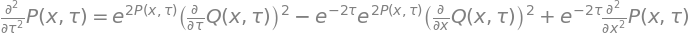

In [52]:
equation2a = Eq(diff(P,tau,tau) , expand(solve( ricciSimplified[2,2].args[1], diff(P,tau,tau) )[0] ) )
equation2a

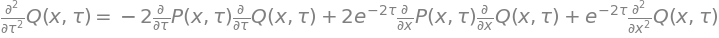

In [51]:
equation2b = Eq(diff(Q,tau,tau), expand(solve(ricciSimplified[3,3].args[1].coeff(Q), diff(Q,tau,tau) )[0] ) )
equation2b 

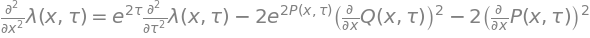

In [32]:
d2lambdadx2 = Eq(diff(Lambda,x,x),solve( ricciSimplified[1,1], diff(Lambda,x,x) )[0])
d2lambdadx2

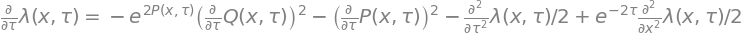

In [33]:
dlambdadtau = Eq(diff(Lambda,tau) ,solve(ricciSimplified[0,0], diff(Lambda,tau) )[0] ) 
dlambdadtau 

In [36]:
equation3a = dlambdadtau.subs(d2lambdadx2.lhs,d2lambdadx2.rhs).expand()
equation3a

In [39]:
equation3b = Eq( diff(Lambda,x),solve(einsteinSimplified[1,0], diff(Lambda,x) )[0] ) 
equation3b

In [54]:
vacuumFieldEquations = Matrix([equation2a,equation2b,equation3a,equation3b])
vacuumFieldEquations

⎡            2                                    2                                 2       
⎢           ∂              2⋅P(x, τ) ⎛∂          ⎞     -2⋅τ  2⋅P(x, τ) ⎛∂          ⎞     -2⋅
⎢          ───(P(x, τ)) = ℯ         ⋅⎜──(Q(x, τ))⎟  - ℯ    ⋅ℯ         ⋅⎜──(Q(x, τ))⎟  + ℯ   
⎢            2                       ⎝∂τ         ⎠                     ⎝∂x         ⎠        
⎢          ∂τ                                                                               
⎢                                                                                           
⎢           2                                                                               
⎢          ∂                 ∂           ∂                -2⋅τ ∂           ∂              -2
⎢         ───(Q(x, τ)) = - 2⋅──(P(x, τ))⋅──(Q(x, τ)) + 2⋅ℯ    ⋅──(P(x, τ))⋅──(Q(x, τ)) + ℯ  
⎢           2                ∂τ          ∂τ                    ∂x          ∂x               
⎢         ∂τ                                                          